In [1]:
import os
import sys
print(os.getcwd())
os.chdir('..')
print(os.getcwd())
sys.path.append(os.getcwd())
print(sys.path)

import logging
import uuid

import pandas as pd
import numpy as np
from sqlalchemy import select, func, distinct, or_, text

sys.path.append(os.getcwd())

from scheme import METHOD, TECHNOLOGY, FOCUS

logging.basicConfig(format='%(asctime)s [%(levelname)s] %(name)s: %(message)s', level=logging.INFO)
logger = logging.getLogger('import')
logger.setLevel(logging.DEBUG)

pd.options.display.max_columns = None

/home/rept/workspace/cdr_ecosystem/Exploration
/home/rept/workspace/cdr_ecosystem
['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/rept/.venvs/main12/lib/python3.12/site-packages', '/home/rept/workspace/cdr_ecosystem']


In [2]:
for t in TECHNOLOGY.values():
    print(t)

{'key': 'tech|0', 'name': 'CCS', 'value': 0, 'colour': (5.54, 74.8, 48.24)}
{'key': 'tech|1', 'name': 'BECCS', 'value': 1, 'colour': (27.53, 97.33, 70.59)}
{'key': 'tech|2', 'name': 'DAC(CS)', 'value': 2, 'colour': (19.91, 89.3, 47.65)}
{'key': 'tech|3', 'name': 'CCUS', 'value': 3, 'colour': (19.14, 96.45, 66.86)}
{'key': 'tech|4', 'name': 'Soil Carbon Sequestration', 'value': 4, 'colour': (144.22, 100.0, 21.37)}
{'key': 'tech|5', 'name': 'Afforestation/Reforestation', 'value': 5, 'colour': (138.42, 53.77, 41.57)}
{'key': 'tech|6', 'name': 'Restoration of landscapes/peats', 'value': 6, 'colour': (121.5, 40.4, 61.18)}
{'key': 'tech|7', 'name': 'Agroforestry', 'value': 7, 'colour': (111.43, 47.57, 79.8)}
{'key': 'tech|8', 'name': 'Forest Management', 'value': 8, 'colour': (104.51, 51.72, 94.31)}
{'key': 'tech|9', 'name': 'Biochar', 'value': 9, 'colour': (336.08, 89.94, 68.82)}
{'key': 'tech|10', 'name': 'Enhanced weathering (land based)', 'value': 10, 'colour': (302.26, 32.92, 68.43)}
{'

In [22]:
df = pd.read_feather('data/cdr_map.arrow').replace({np.nan: None})
key = 'tech|4'
df['target'] = (df[key] >= 0.5).astype(int)
df['label'] = (df[key] >= 0.5).astype(int)
df['text'] = [f"{r['title']} {r['abstract']}" for _, r in df.iterrows()]
df.head()

idx         x         y  publication_year openalex_id  \
0    0 -0.868164 -0.446777              2013  W966429964   
1    1 -0.208374 -0.237793              2011  W965290479   
2    2 -0.975098 -0.104126              2016  W957495025   
3    3 -0.284424 -0.297119              2015  W950113603   
4    4 -0.523926 -0.448975              2012   W94835692   

                                               title  \
0  Role and activities of the IEA Implementing Ag...   
1  Manned Mission Planning Considerations when Us...   
2  Technology assessment of plasma arc reforming ...   
3  Effect of headspace carbon dioxide sequestrati...   
4  A Comparative Economical Analysis of Technolog...   

                                            abstract  \
0  This presentation informs on the FBC Implement...   
1  As the commercial spacecraft industry increase...   
2  Coal to liquids processes contribute significa...   
3  This study investigated the impact of CO2 remo...   
4  Abstract   In the scenario of the Brazilian Pr...   

                                                 doi  \
0                                               None   
1                                               None   
2      https://doi.org/10.1016/j.jclepro.2015.07.104   
3     https://doi.org/10.1016/j.ijhydene.2015.06.077   
4  https://doi.org/10.1016/b978-0-444-59507-2.501...   

                                             authors  \
0                                       Bo G Leckner   
1                                Edward DeSimpelaere   
2  Liberty Sheunesu Mapamba; F.H.D. Conradie; J.I...   
3  Noha Nasr; Preethi Velayutham; Elsayed Elbeshb...   
4  Tatiana Salviano Gadêlha; Aline R. S. Guimarãe...   

                                        institutions    tech|0    tech|1  \
0                                               None  0.981445  0.016174   
1  NASA Johnson Space Center Houston, TX, United ...  0.923828  0.005539   
2  CRCED Vaal, North West University, P Bag x6001...  0.977051  0.023163   
3  Department of Civil and Environmental Engineer...  0.867188   0.01432   
4  Departament of Chemical Engineering, Escola de...       1.0       0.0   

     tech|2    tech|3    tech|4    tech|5    tech|6    tech|7    tech|8  \
0  0.008789    0.0186  0.005455  0.003786  0.003305  0.002365  0.003334   
1  0.059418  0.056519  0.004379  0.004517  0.003096  0.002413  0.002783   
2  0.007385  0.014679  0.005043  0.002974  0.002668  0.001736  0.002699   
3  0.018478   0.19751  0.006443   0.00433  0.003887  0.002653   0.00338   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

     tech|9   tech|10   tech|11   tech|12   tech|13   tech|14   tech|15  \
0  0.003513  0.006363  0.005566  0.004986  0.003685  0.002771  0.012634   
1  0.002541   0.00563   0.00771  0.005707  0.004341  0.002882  0.020523   
2   0.00433  0.004997  0.003798  0.003664  0.003506   0.00198  0.008072   
3  0.009079  0.005333  0.005581  0.002909  0.015205  0.002678  0.009041   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

    tech|16    meth|0    meth|1    meth|2    meth|3    meth|4    meth|5  \
0  0.002268  0.022354  0.034515  0.012947  0.021759  0.011002   0.79248   
1  0.002581  0.018799  0.019226  0.011826  0.024231  0.007748  0.776855   
2   0.00172  0.022598  0.050323  0.972656  0.023026  0.007294  0.051544   
3  0.002478  0.012573  0.984863  0.006203  0.016556  0.003592  0.022186   
4       0.0       0.0       0.0       0.0       1.0       0.0       0.0   

     meth|6    meth|7    meth|8    meth|9    cont|0    cont|1    cont|2  \
0  0.026184  0.037048  0.280273  0.063477  0.015884   0.03186  0.630859   
1  0.023483  0.027466  0.273682  0.059448  0.003393  0.001007   0.00366   
2  0.004601  0.005596  0.007107  0.010315  0.002665  0.000907  0.002499   
3  0.003075  0.002308  0.002825   0.00597  0.002953   0.00131  0.002949   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

     cont|3    cont|4    cont|5  

In [23]:
print(df.shape)
n_all = df.shape[0]
n_excl = (df['label']==0).sum()
n_incl = (df['label']==1).sum()
print(df['label'].value_counts())
print()
# undersample exclusion & subsample everything
df_sample = pd.concat([df[df['label']==0].sample(n=int(((2 * n_incl) / n_all) * n_excl)), df[df['label']==1]]).sample(n=5000)
print(df_sample.shape)
print(df_sample['label'].value_counts())

(50350, 46)
label
0    42706
1     7644
Name: count, dtype: int64

(5000, 46)
label
0    3158
1    1842
Name: count, dtype: int64


## Dataset prep

In [24]:
import numpy as np

import torch
import evaluate
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoModelForMaskedLM

model_name = 'climatebert/distilroberta-base-climate-f'
tokenizer = AutoTokenizer.from_pretrained(model_name, max_length=512)
#model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

dataset = Dataset.from_pandas(df_sample)
tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length=512)
encoded_dataset = dataset.map(lambda rows: tokenizer(rows['text'], padding='max_length', truncation=True), batched=True)

n_total = len(dataset)
n_eval = int(0.2 * n_total)
n_train = n_total - n_eval

shuffeled_dataset = encoded_dataset.shuffle()

# Split the dataset into train and test
train_dataset = shuffeled_dataset.select(range(n_train))
eval_dataset = shuffeled_dataset.select(range(n_train, n_total))

print('train', n_train)
print('eval', n_eval)
print(sum(train_dataset['label']), len(train_dataset))
print(sum(eval_dataset['label']), len(eval_dataset))

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

train 4000
eval 1000
1447 4000
395 1000


## Training

In [25]:
tokenizer = AutoTokenizer.from_pretrained(model_name, max_length=512)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir='data/results',
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=100,
    warmup_steps=200,
    weight_decay=0.01,
    logging_dir='data/logs',
    logging_steps=10,
    eval_strategy='steps',
    eval_steps=100,
)

metrics1 = evaluate.combine(["recall", "precision"])
metrics2 = evaluate.combine(["accuracy", "f1"])

a=None
def compute_metrics(p):
    a=p
    logits, labels = p
    print(p)
    predictions = np.argmax(logits, axis=-1)
    m1 = metrics1.compute(predictions=predictions, references=labels, zero_division=0, average='binary')
    m2 = metrics2.compute(predictions=predictions, references=labels)
    return {**m1, **m2}

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

metrics = evaluate.combine(["recall", "precision", "accuracy", "f1"])

task_evaluator = evaluate.evaluator("text-classification")
eval_results = task_evaluator.compute(
    model_or_pipeline=model,
    data=train_dataset,
    metric=metrics,
)
print(eval_results)
eval_results = task_evaluator.compute(
    model_or_pipeline=model,
    data=eval_dataset,
    metric=metrics,
)
print(eval_results)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[codecarbon INFO @ 19:19:49] [setup] RAM Tracking...
[codecarbon INFO @ 19:19:49] [setup] GPU Tracking...
[codecarbon INFO @ 19:19:49] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 19:19:49] [setup] CPU Tracking...
[codecarbon WARNING @ 19:19:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 19:19:50] We saw that you have a AMD Ryzen 7 5700X 8-Core Processor but we don't know it. Please contact us.
[codecarbon INFO @ 19:19:50] CPU Model on constant consumption mode: AMD Ryzen 7 5700X 8-Core Processor
[codecarbon INFO @ 19:19:50] >>> Tracker's metadata:
[codecarb

[codecarbon INFO @ 19:20:08] Energy consumed for RAM : 0.000098 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:20:08] Energy consumed for all GPUs : 0.000627 kWh. Total GPU Power : 150.4685102011851 W
[codecarbon INFO @ 19:20:08] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:20:08] 0.000902 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:20:23] Energy consumed for RAM : 0.000196 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:20:23] Energy consumed for all GPUs : 0.001245 kWh. Total GPU Power : 148.40634895640775 W
[codecarbon INFO @ 19:20:23] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:20:23] 0.001795 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:20:38] Energy consumed for RAM : 0.000294 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:20:38] Energy consumed for all GPUs : 0.001863 kWh. Total GPU Power : 148.171503025

[codecarbon INFO @ 19:20:53] Energy consumed for RAM : 0.000392 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:20:53] Energy consumed for all GPUs : 0.002484 kWh. Total GPU Power : 149.17236264599273 W
[codecarbon INFO @ 19:20:53] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:20:53] 0.003584 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:21:08] Energy consumed for RAM : 0.000490 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:21:08] Energy consumed for all GPUs : 0.003103 kWh. Total GPU Power : 148.52994394960268 W
[codecarbon INFO @ 19:21:08] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:21:08] 0.004478 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:21:23] Energy consumed for RAM : 0.000588 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:21:23] Energy consumed for all GPUs : 0.003727 kWh. Total GPU Power : 149.76465090

[codecarbon INFO @ 19:21:53] Energy consumed for RAM : 0.000784 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:21:53] Energy consumed for all GPUs : 0.004975 kWh. Total GPU Power : 148.74212480470223 W
[codecarbon INFO @ 19:21:53] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:21:53] 0.007175 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:22:08] Energy consumed for RAM : 0.000882 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:22:08] Energy consumed for all GPUs : 0.005599 kWh. Total GPU Power : 149.83816803770063 W
[codecarbon INFO @ 19:22:08] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:22:08] 0.008074 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:22:23] Energy consumed for RAM : 0.000980 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:22:23] Energy consumed for all GPUs : 0.006221 kWh. Total GPU Power : 149.19491873

[codecarbon INFO @ 19:22:38] Energy consumed for RAM : 0.001077 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:22:38] Energy consumed for all GPUs : 0.006831 kWh. Total GPU Power : 146.57327582846924 W
[codecarbon INFO @ 19:22:38] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:22:38] 0.009857 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:22:53] Energy consumed for RAM : 0.001175 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:22:53] Energy consumed for all GPUs : 0.007460 kWh. Total GPU Power : 151.0571569477428 W
[codecarbon INFO @ 19:22:53] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:22:53] 0.010761 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:23:08] Energy consumed for RAM : 0.001273 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:23:08] Energy consumed for all GPUs : 0.008084 kWh. Total GPU Power : 149.610220055

[codecarbon INFO @ 19:23:38] Energy consumed for RAM : 0.001469 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:23:38] Energy consumed for all GPUs : 0.009329 kWh. Total GPU Power : 150.09536370967382 W
[codecarbon INFO @ 19:23:38] Energy consumed for all CPUs : 0.002656 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:23:38] 0.013454 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:23:53] Energy consumed for RAM : 0.001567 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:23:53] Energy consumed for all GPUs : 0.009948 kWh. Total GPU Power : 148.72273565161964 W
[codecarbon INFO @ 19:23:53] Energy consumed for all CPUs : 0.002833 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:23:53] 0.014349 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:24:08] Energy consumed for RAM : 0.001665 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:24:08] Energy consumed for all GPUs : 0.010572 kWh. Total GPU Power : 149.70310616

[codecarbon INFO @ 19:24:28] Energy consumed for RAM : 0.001796 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:24:28] Energy consumed for all GPUs : 0.011356 kWh. Total GPU Power : 119.72473982706406 W
[codecarbon INFO @ 19:24:28] Energy consumed for all CPUs : 0.003248 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:24:28] 0.016400 kWh of electricity used since the beginning.


{'eval_loss': 0.12642470002174377, 'eval_recall': 0.9848101265822785, 'eval_precision': 0.9396135265700483, 'eval_accuracy': 0.969, 'eval_f1': 0.9616810877626699, 'eval_runtime': 9.8689, 'eval_samples_per_second': 101.329, 'eval_steps_per_second': 1.013, 'epoch': 2.0}


Exception: Impossible to guess which tokenizer to use. Please provide a PreTrainedTokenizer class or a path/identifier to a pretrained tokenizer.

In [ ]:
metrics = evaluate.combine(["recall", "precision", "accuracy", "f1"])

task_evaluator = evaluate.evaluator("text-classification")
eval_results = task_evaluator.compute(
    model_or_pipeline=model,
    tokenizer=tokenizer,
    data=train_dataset,
    metric=metrics,
)
print(eval_results)
eval_results = task_evaluator.compute(
    model_or_pipeline=model,
    tokenizer=tokenizer,
    data=eval_dataset,
    metric=metrics,
)
print(eval_results)

## Training for method

In [11]:
df = pd.read_feather('data/cdr_map.arrow').replace({np.nan: None})

hand_coded = (np.nan_to_num(df[METHOD.keys()].fillna(value=np.nan).to_numpy()).max(axis=1)>0.99)

df['target'] = np.nan_to_num(df[METHOD.keys()].fillna(value=np.nan).to_numpy()).argmax(axis=1).astype(int)
df['label'] = np.nan_to_num(df[METHOD.keys()].fillna(value=np.nan).to_numpy()).argmax(axis=1).astype(int)
df['text'] = [f"{r['title']} {r['abstract']}" for _, r in df.iterrows()]

labels = [mi['name'] for mi in sorted(METHOD.values(), key=lambda x: x['value'])]
print(labels)

print(df.shape)
print(df['label'].value_counts())

#df_sample = df.sample(frac=0.2)
df_sample = df[hand_coded]
print(df_sample.shape)
print(df_sample['label'].value_counts())

df.head()

/tmp/ipykernel_2234586/341497031.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hand_coded = (np.nan_to_num(df[METHOD.keys()].fillna(value=np.nan).to_numpy()).max(axis=1)>0.99)
/tmp/ipykernel_2234586/341497031.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = np.nan_to_num(df[METHOD.keys()].fillna(value=np.nan).to_numpy()).argmax(axis=1).astype(int)
/tmp/ipykernel_2234586/341497031.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_obje

['Experimental - fieldstudy', 'Experimental - laboratory', 'Modelling', 'Data analysis / statistical analysis / econometrics', 'Life cycle assessment', 'Review', 'Systematic review', 'Survey', 'Qualitative research', 'Unknown method']
(50350, 46)
label
1    17410
5    10638
2     9257
0     7817
3     3296
8     1152
4      673
7       54
9       38
6       15
Name: count, dtype: int64
(3684, 46)
label
1    2307
2     401
0     366
5     310
3     152
4      39
9      38
8      37
7      19
6      15
Name: count, dtype: int64


idx         x         y  publication_year openalex_id  \
0    0 -0.868164 -0.446777              2013  W966429964   
1    1 -0.208374 -0.237793              2011  W965290479   
2    2 -0.975098 -0.104126              2016  W957495025   
3    3 -0.284424 -0.297119              2015  W950113603   
4    4 -0.523926 -0.448975              2012   W94835692   

                                               title  \
0  Role and activities of the IEA Implementing Ag...   
1  Manned Mission Planning Considerations when Us...   
2  Technology assessment of plasma arc reforming ...   
3  Effect of headspace carbon dioxide sequestrati...   
4  A Comparative Economical Analysis of Technolog...   

                                            abstract  \
0  This presentation informs on the FBC Implement...   
1  As the commercial spacecraft industry increase...   
2  Coal to liquids processes contribute significa...   
3  This study investigated the impact of CO2 remo...   
4  Abstract   In the scenario of the Brazilian Pr...   

                                                 doi  \
0                                               None   
1                                               None   
2      https://doi.org/10.1016/j.jclepro.2015.07.104   
3     https://doi.org/10.1016/j.ijhydene.2015.06.077   
4  https://doi.org/10.1016/b978-0-444-59507-2.501...   

                                             authors  \
0                                       Bo G Leckner   
1                                Edward DeSimpelaere   
2  Liberty Sheunesu Mapamba; F.H.D. Conradie; J.I...   
3  Noha Nasr; Preethi Velayutham; Elsayed Elbeshb...   
4  Tatiana Salviano Gadêlha; Aline R. S. Guimarãe...   

                                        institutions    tech|0    tech|1  \
0                                               None  0.981445  0.016174   
1  NASA Johnson Space Center Houston, TX, United ...  0.923828  0.005539   
2  CRCED Vaal, North West University, P Bag x6001...  0.977051  0.023163   
3  Department of Civil and Environmental Engineer...  0.867188   0.01432   
4  Departament of Chemical Engineering, Escola de...       1.0       0.0   

     tech|2    tech|3    tech|4    tech|5    tech|6    tech|7    tech|8  \
0  0.008789    0.0186  0.005455  0.003786  0.003305  0.002365  0.003334   
1  0.059418  0.056519  0.004379  0.004517  0.003096  0.002413  0.002783   
2  0.007385  0.014679  0.005043  0.002974  0.002668  0.001736  0.002699   
3  0.018478   0.19751  0.006443   0.00433  0.003887  0.002653   0.00338   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

     tech|9   tech|10   tech|11   tech|12   tech|13   tech|14   tech|15  \
0  0.003513  0.006363  0.005566  0.004986  0.003685  0.002771  0.012634   
1  0.002541   0.00563   0.00771  0.005707  0.004341  0.002882  0.020523   
2   0.00433  0.004997  0.003798  0.003664  0.003506   0.00198  0.008072   
3  0.009079  0.005333  0.005581  0.002909  0.015205  0.002678  0.009041   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

    tech|16    meth|0    meth|1    meth|2    meth|3    meth|4    meth|5  \
0  0.002268  0.022354  0.034515  0.012947  0.021759  0.011002   0.79248   
1  0.002581  0.018799  0.019226  0.011826  0.024231  0.007748  0.776855   
2   0.00172  0.022598  0.050323  0.972656  0.023026  0.007294  0.051544   
3  0.002478  0.012573  0.984863  0.006203  0.016556  0.003592  0.022186   
4       0.0       0.0       0.0       0.0       1.0       0.0       0.0   

     meth|6    meth|7    meth|8    meth|9    cont|0    cont|1    cont|2  \
0  0.026184  0.037048  0.280273  0.063477  0.015884   0.03186  0.630859   
1  0.023483  0.027466  0.273682  0.059448  0.003393  0.001007   0.00366   
2  0.004601  0.005596  0.007107  0.010315  0.002665  0.000907  0.002499   
3  0.003075  0.002308  0.002825   0.00597  0.002953   0.00131  0.002949   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

     cont|3    cont|4    cont|5  

In [12]:
import torch
import evaluate
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoModelForMaskedLM

model_name = 'climatebert/distilroberta-base-climate-f'
tokenizer = AutoTokenizer.from_pretrained(model_name, max_length=512)

dataset = Dataset.from_pandas(df_sample)
tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length=512)
encoded_dataset = dataset.map(lambda rows: tokenizer(rows['text'], padding='max_length', truncation=True), batched=True)

n_total = len(dataset)
n_eval = int(0.2 * n_total)
n_train = n_total - n_eval

shuffeled_dataset = encoded_dataset.shuffle()

# Split the dataset into train and test
train_dataset = shuffeled_dataset.select(range(n_train))
eval_dataset = shuffeled_dataset.select(range(n_train, n_total))

print('train', n_train)
print('eval', n_eval)
print(len(train_dataset), len(eval_dataset))

Map:   0%|          | 0/3684 [00:00<?, ? examples/s]

train 2948
eval 736
2948 736


In [13]:
tokenizer = AutoTokenizer.from_pretrained(model_name, max_length=512)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))

# Define training arguments
training_args = TrainingArguments(
    output_dir='data/results',
    num_train_epochs=4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=50,
    warmup_steps=400,
    weight_decay=0.01,
    logging_dir='data/logs',
    logging_steps=10,
    eval_strategy='steps',
    eval_steps=50,
)


a=None
def compute_metrics(p):
    a=p
    logits, labels = p
    predictions = np.argmax(logits, axis=-1)
    return {
        'recall': evaluate.load('recall').compute(predictions=predictions, references=labels, zero_division=0, average='weighted')['recall'],
        'precision': evaluate.load('precision').compute(predictions=predictions, references=labels, zero_division=0, average='weighted')['precision'],
        'f1': evaluate.load('f1').compute(predictions=predictions, references=labels, labels=np.arange(len(labels)), average='weighted')['f1'],
        'accuracy': evaluate.load('accuracy').compute(predictions=predictions, references=labels, normalize=False)['accuracy']
    }

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

metrics = evaluate.combine(["recall", "precision", "accuracy", "f1"])

task_evaluator = evaluate.evaluator("text-classification")
eval_results = task_evaluator.compute(
    model_or_pipeline=model,
    data=train_dataset,
    metric=metrics,
)
print(eval_results)
eval_results = task_evaluator.compute(
    model_or_pipeline=model,
    data=eval_dataset,
    metric=metrics,
)
print(eval_results)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[codecarbon INFO @ 19:02:43] [setup] RAM Tracking...
[codecarbon INFO @ 19:02:43] [setup] GPU Tracking...
[codecarbon INFO @ 19:02:43] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 19:02:43] [setup] CPU Tracking...
[codecarbon WARNING @ 19:02:43] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 19:02:44] We saw that you have a AMD Ryzen 7 5700X 8-Core Processor but we don't know it. Please contact us.
[codecarbon INFO @ 19:02:44] CPU Model on constant consumption mode: AMD Ryzen 7 5700X 8-Core Processor
[codecarbon INFO @ 19:02:44] >>> Tracker's metadata:
[codecarb

[codecarbon INFO @ 19:03:02] Energy consumed for RAM : 0.000098 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:03:02] Energy consumed for all GPUs : 0.000621 kWh. Total GPU Power : 149.1429701315876 W
[codecarbon INFO @ 19:03:02] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:03:02] 0.000897 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:03:17] Energy consumed for RAM : 0.000196 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 19:03:17] Energy consumed for all GPUs : 0.001241 kWh. Total GPU Power : 148.7683492210786 W
[codecarbon INFO @ 19:03:17] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:03:17] 0.001792 kWh of electricity used since the beginning.
/home/rept/.venvs/main12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples.

/home/rept/.venvs/main12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'eval_loss': 0.4684488773345947, 'eval_recall': 0.8858695652173914, 'eval_precision': 0.8662338312909108, 'eval_f1': 0.8754194064571162, 'eval_accuracy': 652.0, 'eval_runtime': 10.9038, 'eval_samples_per_second': 67.499, 'eval_steps_per_second': 1.376, 'epoch': 4.0}


Exception: Impossible to guess which tokenizer to use. Please provide a PreTrainedTokenizer class or a path/identifier to a pretrained tokenizer.

In [14]:
trainer.save_model('data/models/method')

## Predict on labelled data

In [26]:
preds_orig = []
with torch.no_grad():
    ds = Dataset.from_pandas(df)
    ds = ds.map(lambda x: tokenizer(x['text'], padding='max_length', truncation=True), batched=True)
    ds.set_format('torch')

    for batch in ds.iter(batch_size=100):
        pred = model(input_ids=batch['input_ids'].to('cuda'), attention_mask=batch['attention_mask'].to('cuda'))
        preds_orig.append(torch.softmax(pred.logits, dim=1).cpu())

df['pred|0'] = torch.concatenate(preds_orig)[:,0]
df['pred|1'] = torch.concatenate(preds_orig)[:,1]
df['pred'] = torch.concatenate(preds_orig).argmax(dim=1)
df.head()

Map:   0%|          | 0/50350 [00:00<?, ? examples/s]

idx         x         y  publication_year openalex_id  \
0    0 -0.868164 -0.446777              2013  W966429964   
1    1 -0.208374 -0.237793              2011  W965290479   
2    2 -0.975098 -0.104126              2016  W957495025   
3    3 -0.284424 -0.297119              2015  W950113603   
4    4 -0.523926 -0.448975              2012   W94835692   

                                               title  \
0  Role and activities of the IEA Implementing Ag...   
1  Manned Mission Planning Considerations when Us...   
2  Technology assessment of plasma arc reforming ...   
3  Effect of headspace carbon dioxide sequestrati...   
4  A Comparative Economical Analysis of Technolog...   

                                            abstract  \
0  This presentation informs on the FBC Implement...   
1  As the commercial spacecraft industry increase...   
2  Coal to liquids processes contribute significa...   
3  This study investigated the impact of CO2 remo...   
4  Abstract   In the scenario of the Brazilian Pr...   

                                                 doi  \
0                                               None   
1                                               None   
2      https://doi.org/10.1016/j.jclepro.2015.07.104   
3     https://doi.org/10.1016/j.ijhydene.2015.06.077   
4  https://doi.org/10.1016/b978-0-444-59507-2.501...   

                                             authors  \
0                                       Bo G Leckner   
1                                Edward DeSimpelaere   
2  Liberty Sheunesu Mapamba; F.H.D. Conradie; J.I...   
3  Noha Nasr; Preethi Velayutham; Elsayed Elbeshb...   
4  Tatiana Salviano Gadêlha; Aline R. S. Guimarãe...   

                                        institutions    tech|0    tech|1  \
0                                               None  0.981445  0.016174   
1  NASA Johnson Space Center Houston, TX, United ...  0.923828  0.005539   
2  CRCED Vaal, North West University, P Bag x6001...  0.977051  0.023163   
3  Department of Civil and Environmental Engineer...  0.867188   0.01432   
4  Departament of Chemical Engineering, Escola de...       1.0       0.0   

     tech|2    tech|3    tech|4    tech|5    tech|6    tech|7    tech|8  \
0  0.008789    0.0186  0.005455  0.003786  0.003305  0.002365  0.003334   
1  0.059418  0.056519  0.004379  0.004517  0.003096  0.002413  0.002783   
2  0.007385  0.014679  0.005043  0.002974  0.002668  0.001736  0.002699   
3  0.018478   0.19751  0.006443   0.00433  0.003887  0.002653   0.00338   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

     tech|9   tech|10   tech|11   tech|12   tech|13   tech|14   tech|15  \
0  0.003513  0.006363  0.005566  0.004986  0.003685  0.002771  0.012634   
1  0.002541   0.00563   0.00771  0.005707  0.004341  0.002882  0.020523   
2   0.00433  0.004997  0.003798  0.003664  0.003506   0.00198  0.008072   
3  0.009079  0.005333  0.005581  0.002909  0.015205  0.002678  0.009041   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

    tech|16    meth|0    meth|1    meth|2    meth|3    meth|4    meth|5  \
0  0.002268  0.022354  0.034515  0.012947  0.021759  0.011002   0.79248   
1  0.002581  0.018799  0.019226  0.011826  0.024231  0.007748  0.776855   
2   0.00172  0.022598  0.050323  0.972656  0.023026  0.007294  0.051544   
3  0.002478  0.012573  0.984863  0.006203  0.016556  0.003592  0.022186   
4       0.0       0.0       0.0       0.0       1.0       0.0       0.0   

     meth|6    meth|7    meth|8    meth|9    cont|0    cont|1    cont|2  \
0  0.026184  0.037048  0.280273  0.063477  0.015884   0.03186  0.630859   
1  0.023483  0.027466  0.273682  0.059448  0.003393  0.001007   0.00366   
2  0.004601  0.005596  0.007107  0.010315  0.002665  0.000907  0.002499   
3  0.003075  0.002308  0.002825   0.00597  0.002953   0.00131  0.002949   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

     cont|3    cont|4    cont|5  

/home/rept/.venvs/main12/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


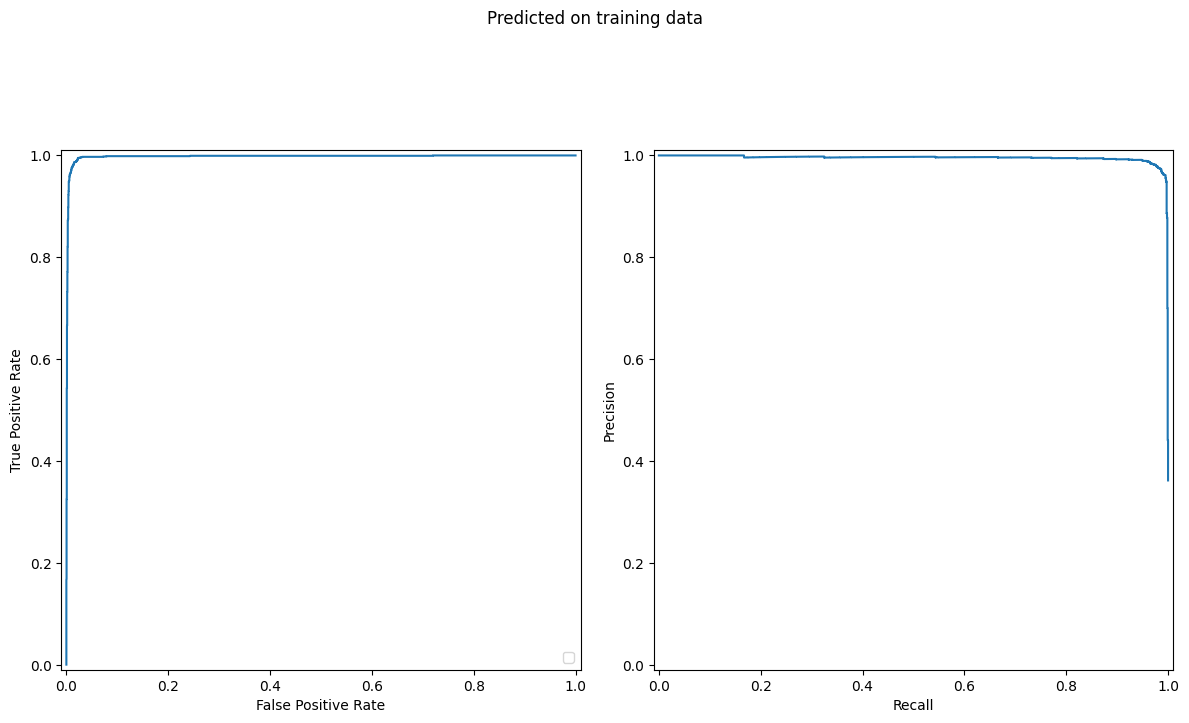

In [27]:
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve, precision_recall_curve, PrecisionRecallDisplay

y_true = df[df['idx'].isin(train_dataset['idx'])]['label']
y_pred = df[df['idx'].isin(train_dataset['idx'])]['pred|1']

fpr, tpr, _ = roc_curve(y_true, y_pred)
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Predicted on training data')
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
fig.tight_layout()
plt.show()

In [28]:
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve

y_true = df[df['idx'].isin(eval_dataset['idx'])]['label']
y_pred = df[df['idx'].isin(eval_dataset['idx'])]['pred|1']

fpr, tpr, _ = roc_curve(y_true, y_pred)
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

fig.suptitle('Predicted on eval data')
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

/home/rept/.venvs/main12/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


In [29]:
pd.DataFrame([precision, recall, thresholds])

0         1         2         3         4         5         6    \
0  0.395000  0.395395  0.395792  0.396189  0.396586  0.396985  0.397384   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000365  0.000369  0.000376  0.000379  0.000381  0.000385  0.000386   

        7         8         9         10        11        12        13   \
0  0.397784  0.398185  0.398587  0.398990  0.399393  0.399798  0.400203   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000386  0.000386  0.000386  0.000387  0.000389  0.000391  0.000392   

        14        15        16        17        18        19        20   \
0  0.400609  0.401015  0.401423  0.401831  0.402240  0.402650  0.403061   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000392  0.000393  0.000399  0.000400  0.000401  0.000401  0.000401   

        21        22        23        24        25        26        27   \
0  0.403473  0.403885  0.404299  0.404713  0.405128  0.405544  0.405961   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000401  0.000402  0.000402  0.000402  0.000402  0.000402  0.000403   

        28        29        30        31        32        33        34   \
0  0.406379  0.406797  0.407216  0.407637  0.408058  0.408480  0.408903   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000404  0.000404  0.000404  0.000406  0.000406  0.000408  0.000408   

        35        36        37        38        39        40        41   \
0  0.409326  0.409751  0.410177  0.410603  0.411030  0.411458  0.411887   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000408  0.000408  0.000409  0.000409  0.000409  0.000410  0.000411   

        42        43        44        45        46        47        48   \
0  0.412317  0.412748  0.413180  0.413613  0.414046  0.414481  0.414916   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000412  0.000412  0.000413  0.000413  0.000414  0.000414  0.000415   

        49        50        51        52        53        54        55   \
0  0.415352  0.415789  0.416228  0.416667  0.417107  0.417548  0.417989   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000415  0.000415  0.000416  0.000416  0.000416  0.000416  0.000417   

        56        57        58        59        60        61        62   \
0  0.418432  0.418876  0.419321  0.419766  0.420213  0.420660  0.421109   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000419  0.000420  0.000421  0.000421  0.000422  0.000422  0.000422   

        63        64        65        66        67        68        69   \
0  0.421558  0.422009  0.422460  0.422912  0.423365  0.423820  0.424275   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000424  0.000424  0.000425  0.000425  0.000426  0.000426  0.000426   

        70        71        72        73        74        75        76   \
0  0.424731  0.425188  0.425647  0.426106  0.426566  0.427027  0.427489   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000426  0.000426  0.000427  0.000427  0.000427  0.000427  0.000427   

        77        78        79        80        81        82        83   \
0  0.427952  0.428416  0.428882  0.429348  0.429815  0.430283  0.430752   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000428  0.000428  0.000428  0.000428  0.000428  0.000429  0.000429   

        84        85        86       87        88        89        90   \
0  0.431223  0.431694  0.432166  0.43264  0.433114  0.433589  0.434066   
1  1.000000  1.000000  1.000000  1.00000  1.000000  1.000000  1.000000   
2  0.000429  0.000429  0.000430  0.00043  0.000430  0.000431  0.000431   

        91        92        93        94        95        96        97   \
0  0.434543  0.435022  0

In [31]:
tradeoff = 611
print('total unseen items:', len(y_pred))
print('precision', precision[tradeoff])
print('recall', recall[tradeoff])
print('threshold', thresholds[tradeoff])
print('to annotate:', (y_pred >= thresholds[tradeoff]).sum())
print('ignored:', (y_pred < thresholds[tradeoff]).sum())
print('num possibly missed:', len(y_pred) * (1 - recall[tradeoff]))
print('num docs to annotate that are probably not relevant:', (y_pred>=thresholds[tradeoff]).sum() * (1 - precision[tradeoff]))

total unseen items: 1000
precision 0.9665809768637532
recall 0.9518987341772152
threshold 0.98017335
to annotate: 389
ignored: 611
num possibly missed: 48.101265822784846
num docs to annotate that are probably not relevant: 12.999999999999998


## Load & predict new data

In [8]:
df_new = pd.read_feather('data/scs/articles.arrow').replace({np.nan: None})
df_new['text'] = [f"{r['title']} {r['abstract']}" for _, r in df_new.iterrows()]
print(df_new.shape)
df_new.head()

(5423, 26)


id                                       display_name  \
0  W997892983  Non-market value evaluation on integrated exte...   
1  W992395523  Effects of straw, phenol and organic acids on ...   
2  W985683334  Soil Carbon Sequestration in Mexico and Centra...   
3  W984747004         Soil Carbon Sequestration in Latin America   
4  W982997543  Monitoring spatio-temporal changes of soil car...   

                                               title  \
0  Non-market value evaluation on integrated exte...   
1  Effects of straw, phenol and organic acids on ...   
2  Soil Carbon Sequestration in Mexico and Centra...   
3         Soil Carbon Sequestration in Latin America   
4  Monitoring spatio-temporal changes of soil car...   

                                            abstract  \
0  Externality is a ubiquitous economic phenomeno...   
1  This study examined the change of soil carbon ...   
2                                               None   
3  It is widely recognized that soil carbon (C) s...   
4  Legacy soil data is an important data source f...   

                                      title_abstract  \
0  Non-market value evaluation on integrated exte...   
1  Effects of straw, phenol and organic acids on ...   
2  Soil Carbon Sequestration in Mexico and Centra...   
3  Soil Carbon Sequestration in Latin America It ...   
4  Monitoring spatio-temporal changes of soil car...   

                                         authorships  \
0  [{'author': {'display_name': 'Qiong Ma', 'id':...   
1  [{'author': {'display_name': 'Hongling Ma', 'i...   
2  [{'author': {'display_name': 'Jorge D. Etcheve...   
3  [{'author': {'display_name': 'Rattan Lal', 'id...   
4  [{'author': {'display_name': 'Yiyi Sulaeman', ...   

                                              biblio  \
0  {"volume":"25","issue":"2","first_page":"154",...   
1  {"volume":"22","issue":"1","first_page":"71","...   
2                                               None   
3                                               None   
4                                               None   

                                           locations  is_retracted  \
0  [{'is_oa': False, 'is_primary': True, 'landing...         False   
1  [{'is_oa': False, 'is_primary': True, 'landing...         False   
2  [{'is_oa': False, 'is_primary': True, 'landing...         False   
3  [{'is_oa': False, 'is_primary': True, 'landing...         False   
4  [{'is_oa': False, 'is_primary': False, 'landin...         False   

  is_accepted  cited_by_count  is_paratext is_published language  \
0       False               0        False        False       en   
1       False               0        False        False       en   
2       False               3        False        False       en   
3       False               9        False        False       en   
4       False               0        False        False       en   

           type        mag  publication_year            _version_  \
0       article  997892983              2013  1792777992841199624   
1       article  992395523              2009  1792712295818723334   
2  book-chapter  985683334              2006  1792854775877861378   
3  book-chapter  984747004              2006  1792725330928074756   
4       article  982997543              2010  1792884046839152640   

       publication_date          created_date              updated_date  \
0  2013-01-01T00:00:00Z  2016-06-24T00:00:00Z  2024-02-21T04:41:57.827Z   
1  2009-01-01T00:00:00Z  2016-06-24T00:00:00Z  2024-02-06T14:42:33.158Z   
2  2006-07-05T00:00:00Z  2016-06-24T00:00:00Z  2024-02-24T03:12:00.112Z   
3  2006-07-05T00:00:00Z  2016-06-24T00:00:00Z  2024-02-18T05:54:54.959Z   
4  2010-01-01T00:00:00Z  2016-06-24T00:00:00Z  2024-02-24T08:42:34.233Z   

   indexed_in                                       doi  pmid pmcid  \
0        None                                      None  None  None   
1        None                                      None  None  None   
2  [cros

In [9]:
preds = []
with torch.no_grad():
    ds_new = Dataset.from_pandas(df_new)
    ds_new = ds_new.map(lambda x: tokenizer(x['text'], padding='max_length', truncation=True), batched=True)
    ds_new.set_format("torch")

    for batch in ds_new.iter(batch_size=100):
        pred = model(input_ids=batch['input_ids'].to('cuda'), attention_mask=batch['attention_mask'].to('cuda') )
        preds.append(torch.softmax(pred.logits, dim=1))

df_new['pred|0'] = torch.concatenate(preds).cpu()[:,0]
df_new['pred|1'] = torch.concatenate(preds).cpu()[:,1]
df_new['pred'] = torch.concatenate(preds).cpu().argmax(dim=1)

print(df.shape)
print(df_new.shape)
print(f'predicted exclude: {(df_new['pred|0']>0.5).sum()} | predicted include: {(df_new['pred|1']>=0.5).sum()}')

df_new.head()

Map:   0%|          | 0/5423 [00:00<?, ? examples/s]

(50350, 46)
(5423, 29)
predicted exclude: 898 | predicted include: 4525


id                                       display_name  \
0  W997892983  Non-market value evaluation on integrated exte...   
1  W992395523  Effects of straw, phenol and organic acids on ...   
2  W985683334  Soil Carbon Sequestration in Mexico and Centra...   
3  W984747004         Soil Carbon Sequestration in Latin America   
4  W982997543  Monitoring spatio-temporal changes of soil car...   

                                               title  \
0  Non-market value evaluation on integrated exte...   
1  Effects of straw, phenol and organic acids on ...   
2  Soil Carbon Sequestration in Mexico and Centra...   
3         Soil Carbon Sequestration in Latin America   
4  Monitoring spatio-temporal changes of soil car...   

                                            abstract  \
0  Externality is a ubiquitous economic phenomeno...   
1  This study examined the change of soil carbon ...   
2                                               None   
3  It is widely recognized that soil carbon (C) s...   
4  Legacy soil data is an important data source f...   

                                      title_abstract  \
0  Non-market value evaluation on integrated exte...   
1  Effects of straw, phenol and organic acids on ...   
2  Soil Carbon Sequestration in Mexico and Centra...   
3  Soil Carbon Sequestration in Latin America It ...   
4  Monitoring spatio-temporal changes of soil car...   

                                         authorships  \
0  [{'author': {'display_name': 'Qiong Ma', 'id':...   
1  [{'author': {'display_name': 'Hongling Ma', 'i...   
2  [{'author': {'display_name': 'Jorge D. Etcheve...   
3  [{'author': {'display_name': 'Rattan Lal', 'id...   
4  [{'author': {'display_name': 'Yiyi Sulaeman', ...   

                                              biblio  \
0  {"volume":"25","issue":"2","first_page":"154",...   
1  {"volume":"22","issue":"1","first_page":"71","...   
2                                               None   
3                                               None   
4                                               None   

                                           locations  is_retracted  \
0  [{'is_oa': False, 'is_primary': True, 'landing...         False   
1  [{'is_oa': False, 'is_primary': True, 'landing...         False   
2  [{'is_oa': False, 'is_primary': True, 'landing...         False   
3  [{'is_oa': False, 'is_primary': True, 'landing...         False   
4  [{'is_oa': False, 'is_primary': False, 'landin...         False   

  is_accepted  cited_by_count  is_paratext is_published language  \
0       False               0        False        False       en   
1       False               0        False        False       en   
2       False               3        False        False       en   
3       False               9        False        False       en   
4       False               0        False        False       en   

           type        mag  publication_year            _version_  \
0       article  997892983              2013  1792777992841199624   
1       article  992395523              2009  1792712295818723334   
2  book-chapter  985683334              2006  1792854775877861378   
3  book-chapter  984747004              2006  1792725330928074756   
4       article  982997543              2010  1792884046839152640   

       publication_date          created_date              updated_date  \
0  2013-01-01T00:00:00Z  2016-06-24T00:00:00Z  2024-02-21T04:41:57.827Z   
1  2009-01-01T00:00:00Z  2016-06-24T00:00:00Z  2024-02-06T14:42:33.158Z   
2  2006-07-05T00:00:00Z  2016-06-24T00:00:00Z  2024-02-24T03:12:00.112Z   
3  2006-07-05T00:00:00Z  2016-06-24T00:00:00Z  2024-02-18T05:54:54.959Z   
4  2010-01-01T00:00:00Z  2016-06-24T00:00:00Z  2024-02-24T08:42:34.233Z   

   indexed_in                                       doi  pmid pmcid  \
0        None                                      None  None  None   
1        None                                      None  None  None   
2  [cros

### Overlaps

In [10]:
orig = set(df[df[key]>=0.5]['openalex_id'])
new = set(df_new[df_new['pred']>0]['id'])

print(len(orig), len(new))

print('new', len(new - orig))
print('missing', len(orig - new))
print('overlap', len(orig & new))
print('union', len(orig | new))
print('xor', len(orig ^ new))  #  in a or b but not both

7644 5423
new 2290
missing 4511
overlap 3133
union 9934
xor 6801


In [ ]:
orig = set(df[df[key]>=0.5]['openalex_id'])
new = set(df_new['id'])

print(len(orig), len(new))

print('new', len(new - orig))
print('missing', len(orig - new))
print('overlap', len(orig & new))
print('union', len(orig | new))
print('xor', len(orig ^ new))  #  in a or b but not both

## Predict method

In [15]:
preds = []
with torch.no_grad():
    ds_new = Dataset.from_pandas(df_new)
    ds_new = ds_new.map(lambda x: tokenizer(x['text'], padding='max_length', truncation=True), batched=True)
    ds_new.set_format("torch")

    for batch in ds_new.iter(batch_size=100):
        pred = model(input_ids=batch['input_ids'].to('cuda'), attention_mask=batch['attention_mask'].to('cuda') )
        preds.append(torch.softmax(pred.logits, dim=1))

Map:   0%|          | 0/5423 [00:00<?, ? examples/s]

In [16]:
for i in range(len(labels)):
    df_new[f'meth|{i}'] = torch.concatenate(preds).cpu()[:,i]
    df_new['meth'] = torch.concatenate(preds).cpu().argmax(dim=1)
for i, v in df_new['meth'].value_counts().items():
    print(i, labels[i], ':', v)

0 Experimental - fieldstudy : 1887
5 Review : 1202
2 Modelling : 892
3 Data analysis / statistical analysis / econometrics : 729
1 Experimental - laboratory : 423
8 Qualitative research : 162
4 Life cycle assessment : 70
9 Unknown method : 29
6 Systematic review : 27
7 Survey : 2


## Estimations

In [17]:
print(f'predicted exclude: {(df_new['pred|0']>0.5).sum()}')
print(f'predicted include: {(df_new['pred|1']>=0.5).sum()}')
print(f'predicted include and review: {((df_new['pred|1']>=0.5) & (df_new['meth|5']>0.5)).sum()}')

predicted exclude: 898
predicted include: 4525
predicted include and review: 903


### Reviews by classifier

In [18]:
for i, row in df_new[df_new['meth|5']>0.5].sort_values(by='publication_year').iterrows():
    print(i, row['pred'], row['doi'], row['publication_year'], row['title'])

5111 1 https://doi.org/10.1016/0002-9416(80)90031-7 1980 The temporomandibular joint: A biological basis for clinical practice
4559 1 https://doi.org/10.23986/afsci.72746 1996 Sensitivity of temperate grassland species to elevated atmospheric CO2 and the interaction with temperature and water stress
5141 1 https://doi.org/10.1016/s0093-691x(97)82524-1 1997 Potential of the porcine zona pellucida (PZP) being an immunocontraceptive agent for elephants
5019 1 https://doi.org/10.1111/j.1475-2743.1999.tb00068.x 1999 After the Kyoto Protocol: Can soil scientists make a useful contribution?*
64 1 None 1999 Prevention of land degradation, enhancement of carbon sequestration and conservation of biodiversity through land use change and sustainable land management with a focus on Latin America and the Caribbean : proceedings of the IFAD/FAO Expert Consultation, IFAD, Rome, Italy, 15 April 1999
4310 1 https://doi.org/10.1046/j.1365-2486.2000.00308.x 2000 Soil carbon sequestration and land‐use chan

### Reviews by title

In [19]:
def oring(arr):
    ret = arr[0]
    for a in arr[1:]:
        ret |= a
    return ret

masks = {
    term: df_new['title'].str.lower().str.contains(term)
    for term in ['systematic review', 'map', 'systematic map', 'meta analysis', 'meta-analysis', 'evidence synthesis']
}

for k, v in masks.items():
    print(k, v.sum())

print()

mask_or = oring(list(masks.values()))
print('ORed', mask_or.sum())

mask_incl = df_new['pred|1']>=0.5
print('ORed & incl', (mask_or & mask_incl).sum())

systematic review 6
map 72
systematic map 6
meta analysis 1
meta-analysis 55
evidence synthesis 0

ORed 134
ORed & incl 120


In [20]:
for i, row in df_new[mask_or].sort_values(by='publication_year').iterrows():
    print(i, row['pred'], row['doi'], row['publication_year'], row['title'])

5149 0 https://doi.org/10.2307/1936984 1981 Forests of the Southeastern United States: Quantitative Maps for Abovegound Woody Biomass, Carbon, and Dominance of Major Tree Taxa
3687 0 None 1981 QUANTITATIVE MAPS FOR ABOVEGROUND WOODY BIOMASS, CARBON, AND DOMINANCE OF MAJOR TREE TAXA1
4450 0 https://doi.org/10.1016/j.enpol.2008.09.034 2008 Bioenergy for heat and electricity in the UK: A research atlas and roadmap
4456 1 https://doi.org/10.1071/sr09111 2010 Mapping and comparing the distribution of soil carbon under cropping and grazing management practices in Narrabri, north-west New South Wales
4236 1 None 2010 Digital soil mapping using legacy soil data in Korea.
4343 1 https://doi.org/10.1016/j.agee.2011.10.019 2012 Soil carbon sequestration and associated economic costs for farming systems of the Indo-Gangetic Plain: A meta-analysis
4591 1 https://doi.org/10.1088/1748-9326/8/1/015011 2013 Mapping of soil organic carbon stocks for spatially explicit assessments of climate change mitig

### PDF and parsed

In [36]:
df_new.shape

(5423, 40)

In [39]:
df_new.columns

Index(['id', 'display_name', 'title', 'abstract', 'title_abstract',
       'authorships', 'biblio', 'locations', 'is_retracted', 'is_accepted',
       'cited_by_count', 'is_paratext', 'is_published', 'language', 'type',
       'mag', 'publication_year', '_version_', 'publication_date',
       'created_date', 'updated_date', 'indexed_in', 'doi', 'pmid', 'pmcid',
       'text', 'pred|0', 'pred|1', 'pred', 'meth|0', 'meth', 'meth|1',
       'meth|2', 'meth|3', 'meth|4', 'meth|5', 'meth|6', 'meth|7', 'meth|8',
       'meth|9'],
      dtype='object')

In [47]:
from pathlib import Path

pdfs = [f.stem for f in Path('data/scs/pdfs').glob('*.pdf')]
teis = [f.stem.split('.')[0] for f in Path('data/scs/teis').glob('*.xml')]
print(len(pdfs), df_new['id'].isin(pdfs).sum())
print(len(teis), df_new['id'].isin(teis).sum())

m_incl = df_new['pred|1'] > 0.5
m_rev = df_new['meth|5'] > 0.5

print('total', len(df_new))
print('incl', m_incl.sum(), (m_incl & df_new['id'].isin(pdfs)).sum(), (m_incl & df_new['id'].isin(teis)).sum())
print('reviews', m_rev.sum(), (m_rev & df_new['id'].isin(pdfs)).sum(), (m_rev & df_new['id'].isin(teis)).sum())
print('reviews & incl', (m_rev & m_incl).sum(), (m_rev & m_incl & df_new['id'].isin(pdfs)).sum(), (m_rev & m_incl & df_new['id'].isin(teis)).sum())

1644 1644
1579 1579
total 5423
incl 4525 1383 1331
reviews 1084 311 297
reviews & incl 903 263 251


### Save predictions

In [21]:
df_new.to_feather('data/scs/predictions.arrow')

In [48]:
df.to_feather('data/scs/predictions_orig.arrow')